# Scraping LinkedIn

In [206]:
from selenium import webdriver
driver=webdriver.Chrome()
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="c9a5b82ae2b1d6dff9269c0022a1a5e2")>

In [ ]:
#Providing Link from LinkedIn to be Scraped

In [207]:
driver.get('https://www.linkedin.com/jobs/search/?keywords=Data%20Scientist&location=India&locationId=&geoId=102713980&f_TPR=r604800&position=1&pageNum=0')

In [ ]:
#Scraping Basic information on the Jobs Available of Data Science

In [166]:
title=[]
company=[]
location=[]
w_t=[]
work_type=['On-site','Hybrid','Remote']

In [ ]:
# Since there are many jobs where Job type is not mentioned, adding another class for such cases

In [185]:
main=driver.find_elements_by_class_name('job-card-container')
for i in main:
    split=i.text.split('\n')
    if split[3] in work_type:
        title.append(split[0])
        company.append(split[1])
        location.append(split[2])
        w_t.append(split[3])
    else:
        title.append(split[0])
        company.append(split[1])
        location.append(split[2])
        w_t.append('Not specified')




        

C:\Users\lenov\AppData\Local\Temp/ipykernel_23428/451957995.py:1: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
  main=driver.find_elements_by_class_name('job-card-container')


In [194]:
links=[]
l=driver.find_elements_by_tag_name('button')
for i in l:
    links.append(i.get_property('href'))
links

# //*[@id="ember16720"]/button/span
# //*[@id="ember16723"]/button/span

C:\Users\lenov\AppData\Local\Temp/ipykernel_23428/4053726890.py:2: DeprecationWarning: find_elements_by_tag_name is deprecated. Please use find_elements(by=By.TAG_NAME, value=name) instead
  l=driver.find_elements_by_tag_name('button')


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [187]:
import pandas as pd
d = {'Title': title, 'Company': company
, 'Location': location, 'Work Type': w_t}
df = pd.concat([pd.Series(v, name=k) for k, v in d.items()], axis=1)
df

,Title,Company,Location,Work Type
0,Data Scientist: Advanced Analytics,IBM,"Bengaluru, Karnataka, India",On-site
1,Data Scientist (R-12083),Dun & Bradstreet,"Hyderabad, Telangana, India",Not specified
2,Data Scientist: Artificial Intelligence,IBM,"Bengaluru, Karnataka, India",On-site
3,Data Scientist: Artificial Intelligence,IBM,"Bengaluru, Karnataka, India",On-site
4,AGM-Data Scientist,Vodafone Idea Limited,"Mumbai, Maharashtra, India",On-site
...,...,...,...,...
402,Software Engineer-Ruby on Rails -GovD,Granicus,"Bangalore Urban, Karnataka, India",Remote
403,Data Science Specialist,TransOrg Analytics,"Gurgaon, Haryana, India",On-site
404,HTML Developer,Uplers,"Pune, Maharashtra, India",Remote
405,PHP Developer,AppWebStudios,"Gurugram, Haryana, India",On-site


In [ ]:
#Below fig shows the distribution of Job types in India for Data Science Job

C:\Users\lenov\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work Type', ylabel='count'>

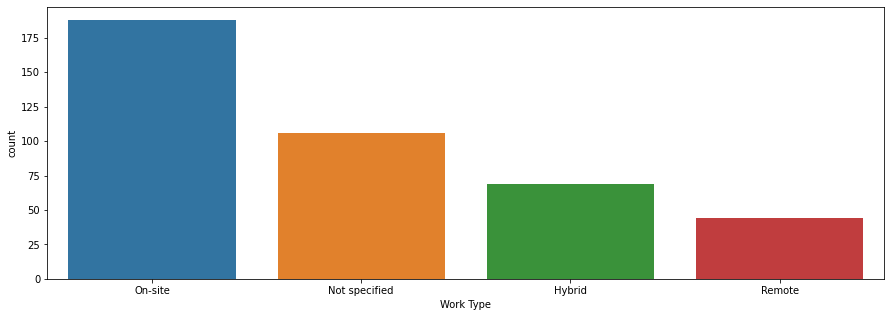

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
sns.countplot(df['Work Type'])

In [ ]:
# As Data Science being a resarch oriented field we can observe that most of the companies require On-site work

In [191]:
df['Location'].value_counts()

Bengaluru, Karnataka, India                  163
Mumbai, Maharashtra, India                    32
Hyderabad, Telangana, India                   30
India                                         28
Pune, Maharashtra, India                      24
Gurgaon, Haryana, India                       21
Chennai, Tamil Nadu, India                    19
Gurugram, Haryana, India                      19
Bangalore Urban, Karnataka, India             13
Noida, Uttar Pradesh, India                    8
Ahmedabad, Gujarat, India                      5
Kolkata, West Bengal, India                    5
New Delhi, Delhi, India                        4
Delhi, Delhi, India                            4
Greater Bengaluru Area                         3
Pune/Pimpri-Chinchwad Area                     3
Trivandrum, Kerala, India                      3
Greater Kolkata Area                           2
Udaipur, Rajasthan, India                      2
South Delhi, Delhi, India                      1
Faridabad, Haryana, 

In [197]:
df['Title'].value_counts().head(20)

Data Scientist                                                  108
Senior Data Scientist                                            38
Lead Data Scientist                                              14
Sr. Data Scientist                                               10
Staff Data Scientist                                              9
Data Scientist: Artificial Intelligence                           7
Principal Data Scientist                                          6
Applied Data Scientist                                            6
Python Django Training Program                                    4
Data scientist                                                    4
Lead Data Scientist – AI Graph Expert                             4
Tech Consulting- IA- Data Scientist -Senior                       4
Head - Quantitative Analytics Division (Lead data Scientist)      4
Data Scientist I                                                  3
Data Scientist 1                                

In [198]:
df['Company'].value_counts().head(20) 
#since the data contains past week data 

IBM                                        10
Accenture in India                          9
Amazon                                      8
GFL Recruitment Private Limited             7
EY                                          6
Deloitte                                    6
EAGateway Services India Pvt Ltd            6
PayPal                                      6
Walmart Global Tech India                   5
Tata Consultancy Services                   5
Ecolab                                      5
Applied Materials                           5
Societe Generale Global Solution Centre     5
JPMorgan Chase & Co.                        4
GC Internships                              4
HP                                          4
o9 Solutions, Inc.                          4
Thomson Reuters                             4
Tesco Bengaluru                             4
dunnhumby                                   3
Name: Company, dtype: int64

In [ ]:
#EDA- Work Type specific to Banglore

C:\Users\lenov\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work Type', ylabel='count'>

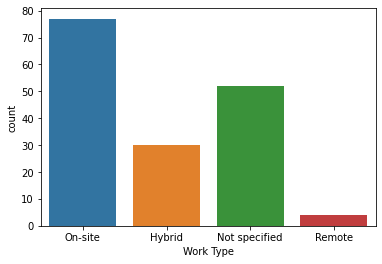

In [205]:
b_df=df[df['Location']=='Bengaluru, Karnataka, India']
sns.countplot(b_df['Work Type'])

In [ ]:
Key Learnings:

- Log in-Layout changes
- Required info doesnt have specified tabs
- Class name changes - Links Available 713 


In [ ]:
Conclusion: Required Info was succesfully scraped from LinkedIn, further performing EDA provided us with useful Insights.